# Exploratory Data Analysis

## First Glance

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gc
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 9)

Populating the interactive namespace from numpy and matplotlib


Sample the train set, data is huge

In [2]:
df = pd.read_csv('../input/train_ver2.csv', nrows=1)

In [3]:
df.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

In [4]:
cols = ['fecha_dato', 'ncodpers', 'fecha_alta']
df = pd.read_csv('../input/train_ver2.csv', usecols=cols)

In [5]:
df.shape

(13647309, 3)

In [6]:
df.head()

,fecha_dato,ncodpers,fecha_alta
0,2015-01-28,1375586,2015-01-12
1,2015-01-28,1050611,2012-08-10
2,2015-01-28,1050612,2012-08-10
3,2015-01-28,1050613,2012-08-10
4,2015-01-28,1050614,2012-08-10


In [7]:
df.fecha_dato = pd.to_datetime(df.fecha_dato, format='%Y-%m-%d')
df.fecha_alta = pd.to_datetime(df.fecha_alta, format='%Y-%m-%d')

In [8]:
df.head()

,fecha_dato,ncodpers,fecha_alta
0,2015-01-28,1375586,2015-01-12
1,2015-01-28,1050611,2012-08-10
2,2015-01-28,1050612,2012-08-10
3,2015-01-28,1050613,2012-08-10
4,2015-01-28,1050614,2012-08-10


In [11]:
pd.DatetimeIndex(df.fecha_dato).min()

Timestamp('2015-01-28 00:00:00')

In [12]:
pd.DatetimeIndex(df.fecha_dato).max()

Timestamp('2016-05-28 00:00:00')

(array([1252851., 1259576.,  631957., 1461927.,  843201., 1757691.,
        1818130.,  916269., 1845980., 1859727.]),
 array([735626. , 735674.6, 735723.2, 735771.8, 735820.4, 735869. ,
        735917.6, 735966.2, 736014.8, 736063.4, 736112. ]),
 <a list of 10 Patch objects>)

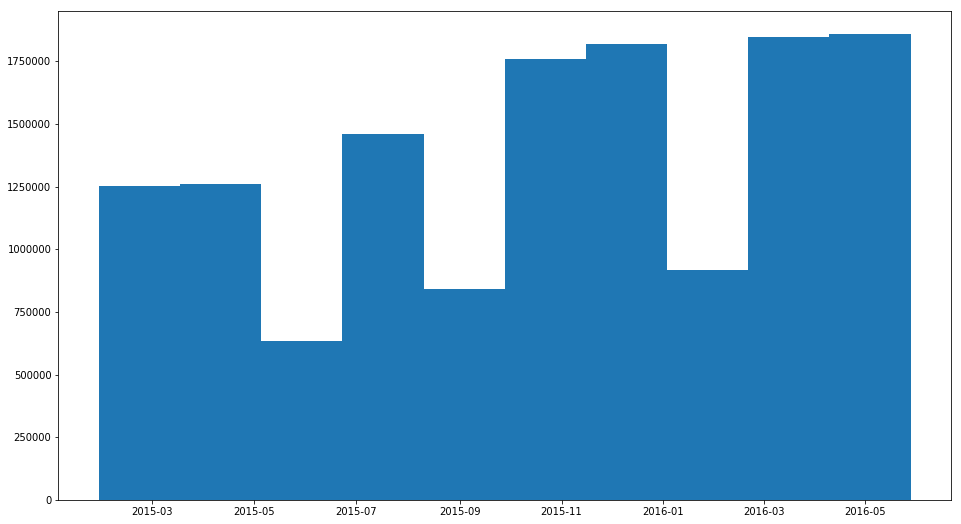

In [14]:
plt.figure(figsize=(16, 9))
plt.hist(df.fecha_dato)

(array([   27734.,        0.,        0.,        0.,        0.,        0.,
               0.,        0.,        0., 13619575.]),
 array([612411.0088327 , 624781.40794943, 637151.80706616, 649522.20618289,
        661892.60529962, 674263.00441635, 686633.40353308, 699003.80264981,
        711374.20176654, 723744.60088327, 736115.        ]),
 <a list of 10 Patch objects>)

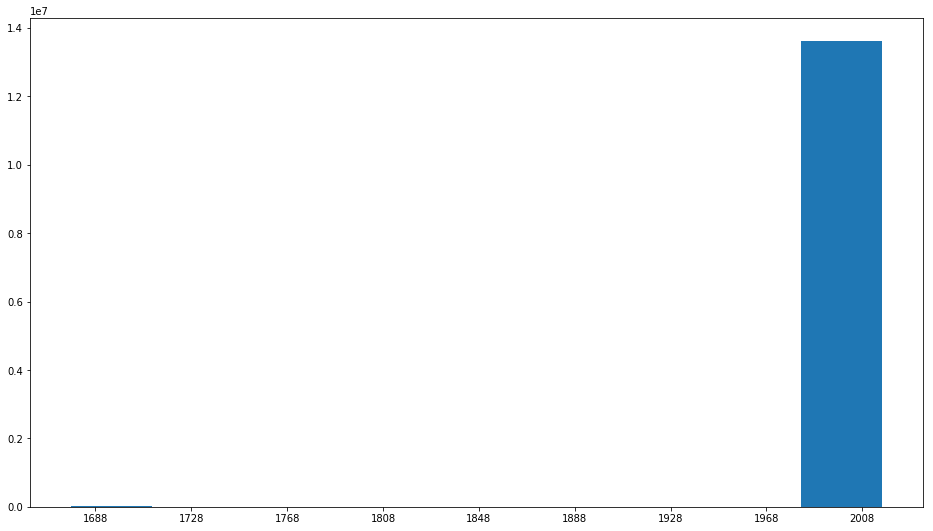

In [15]:
plt.figure(figsize=(16, 9))
plt.hist(df.fecha_alta)

In [16]:
df.fecha_alta.min()

Timestamp('1995-01-16 00:00:00')

In [17]:
df.fecha_alta.max()

Timestamp('2016-05-31 00:00:00')

In [18]:
df.isnull().any()

fecha_dato    False
ncodpers      False
fecha_alta     True
dtype: bool

In [19]:
df.fecha_alta.isnull().sum()

27734

In [20]:
month_count = df.fecha_dato.value_counts()

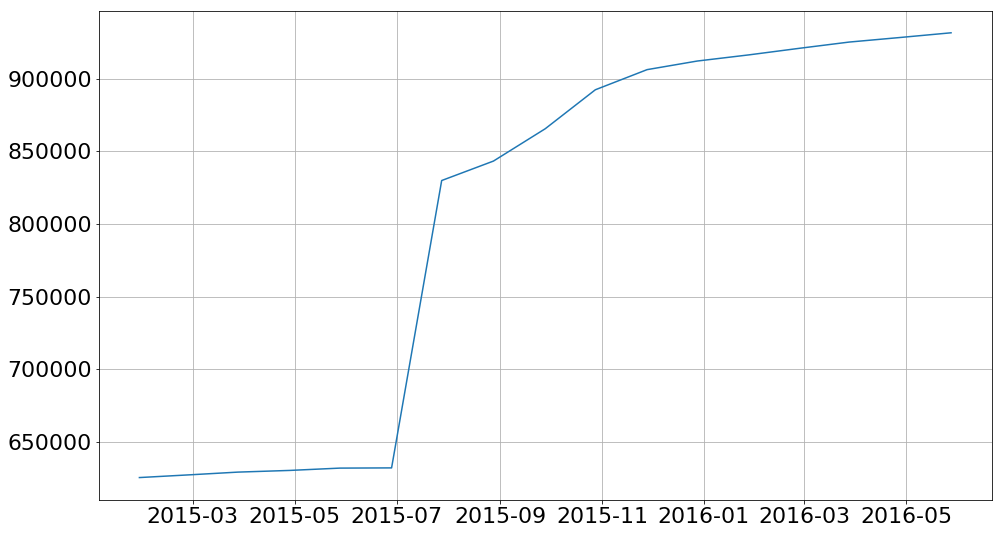

In [26]:
plt.figure(figsize=(16, 9))
plt.rcParams.update({'font.size': 22})
plt.plot(month_count.index, month_count.values)
plt.grid()

In [27]:
month_count

2016-05-28    931453
2016-04-28    928274
2016-03-28    925076
2016-02-28    920904
2016-01-28    916269
2015-12-28    912021
2015-11-28    906109
2015-10-28    892251
2015-09-28    865440
2015-08-28    843201
2015-07-28    829817
2015-06-28    632110
2015-05-28    631957
2015-04-28    630367
2015-03-28    629209
2015-02-28    627394
2015-01-28    625457
Name: fecha_dato, dtype: int64

In [31]:
fecha_alta_month = df.fecha_alta.value_counts()
fecha_alta_month.sort_index(inplace=True)

(727918.7, 736505.3)

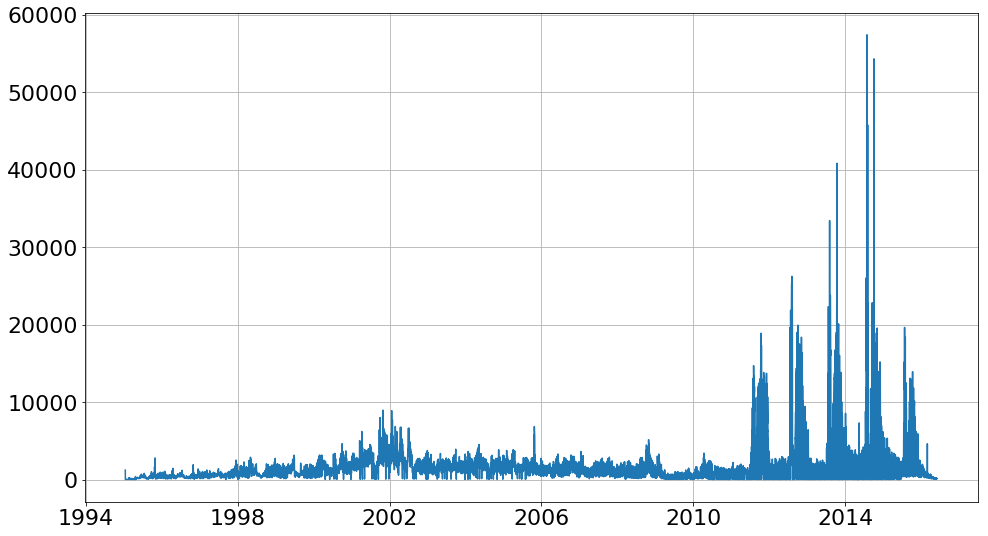

In [33]:
plt.figure(figsize=(16, 9))
plt.rcParams.update({'font.size': 22})
plt.plot(fecha_alta_month.index, fecha_alta_month.values)
plt.grid()
plt.xlim()

In [47]:
start = pd.datetime(2011, 1, 27)
end = pd.datetime(2015, 5, 28)
index = pd.date_range(start, end, freq='D')

(734084.9, 735825.1)

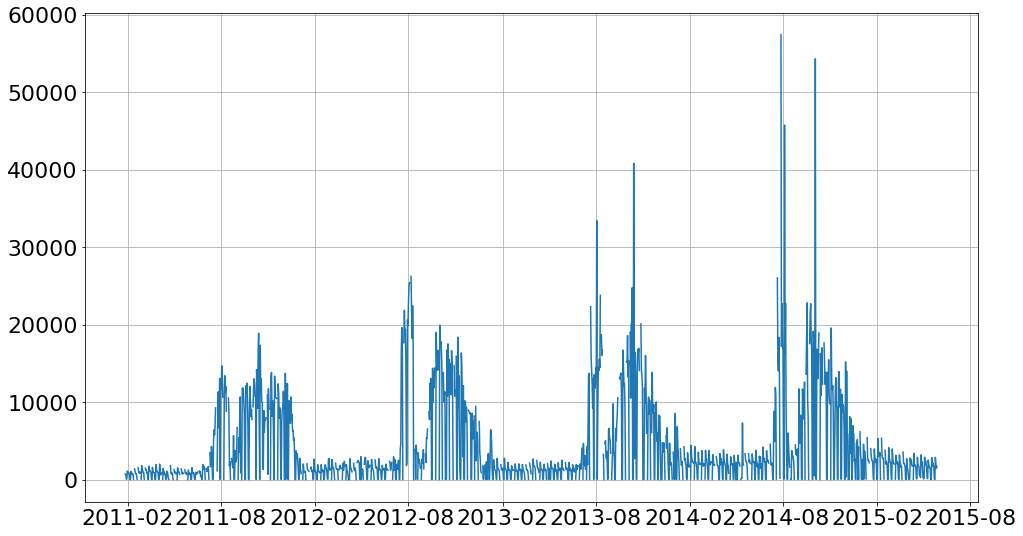

In [48]:
plt.figure(figsize=(16, 9))
plt.rcParams.update({'font.size': 22})
plt.plot(fecha_alta_month[index].index, fecha_alta_month[index].values)
plt.grid()
plt.xlim()

In [52]:
df['alta_month'] = pd.DatetimeIndex(df.fecha_alta).month

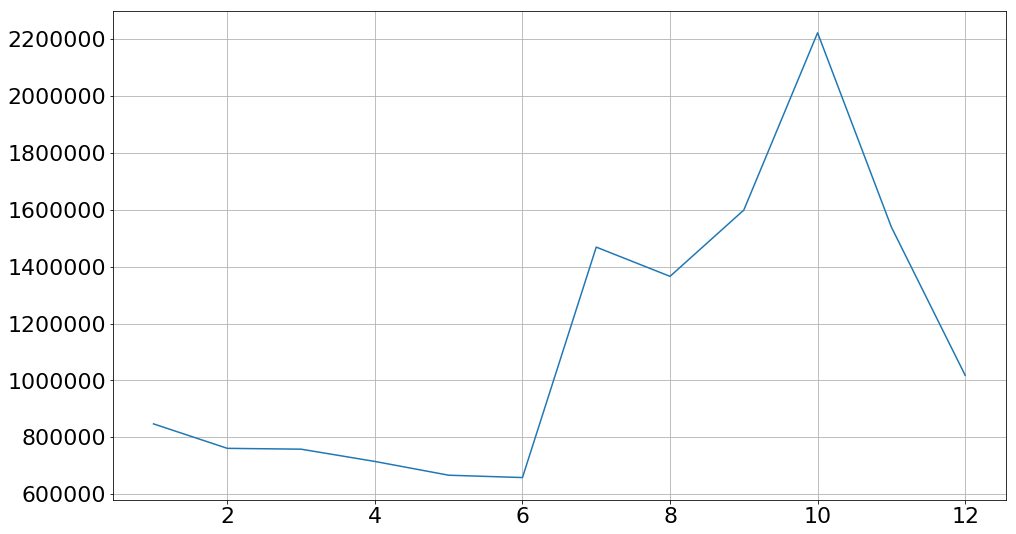

In [56]:
alta_month_count = df.alta_month.value_counts().sort_index()
plt.figure(figsize=(16, 9))
plt.plot(alta_month_count.index, alta_month_count.values)
plt.grid()

In [60]:
fecha_alta_month_1 = fecha_alta_month.groupby(
    by=[fecha_alta_month.index.year, 
        fecha_alta_month.index.month]).count()

In [80]:
dg = df.copy()
dg.set_index('fecha_alta', drop=True, inplace=True)
dg = dg.resample('M')['alta_month'].count()

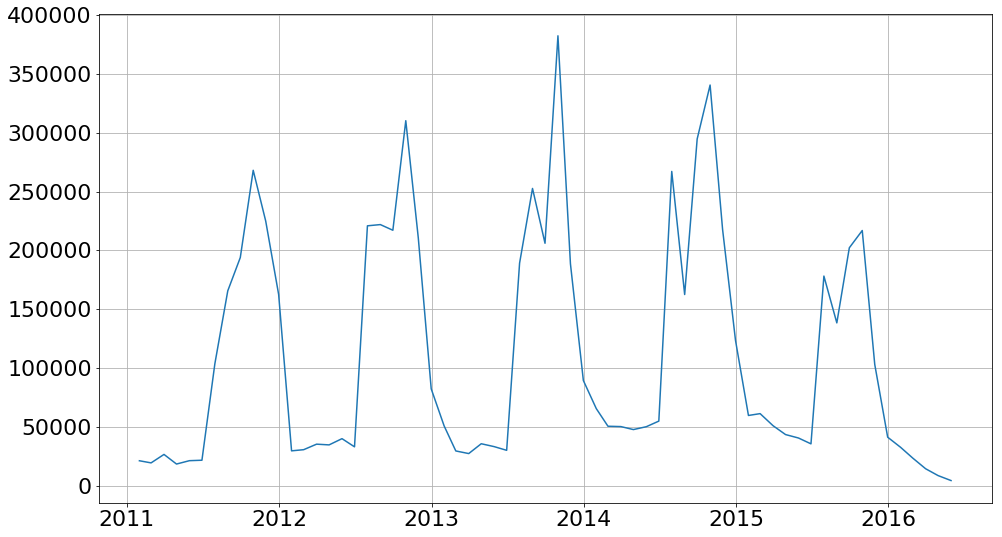

In [93]:
index = pd.date_range(pd.datetime(2011, 1, 1), pd.datetime(2017, 1, 1), freq='M')
plt.figure(figsize=(16, 9))
plt.plot(dg[index].index, dg[index].values)
plt.grid()

In [94]:
dc = dg.groupby()

In [97]:
dc.index.month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
             6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,
             4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,
             9, 10, 11, 12],
           dtype='int64')